# 1.Categorical Variable Encoding

### 1.1 Dummy Variables & one-Hot Encoding

In [65]:
import pandas as pd
tips_df = pd.read_csv("D:\\Assets\\tips.csv")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [67]:
dummy_df = pd.get_dummies(tips_df) # convert dummy variable
dummy_df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [70]:
# pd.get_dummies(data, prefix_sep='_', dummy_na= False, columns=None, sparse=False, drop_first=False, dtype=None)

In [69]:
pd.get_dummies(tips_df, drop_first=True) # one column remove/drop

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


### one-hot Encoding with Scikit-learn

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
oh_enc = OneHotEncoder(sparse=False)

In [74]:
oh_enc_arr = oh_enc.fit_transform(tips_df[['sex','smoker','day','time']])
oh_enc_arr

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [75]:
dummy_df.keys()

Index(['total_bill', 'tip', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'],
      dtype='object')

In [77]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'])
oh_enc_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 2.Label Encoding & Ordinal Encoding

In [79]:
# Label Encoding: Apply on ordinal and nominal categorical variables
# Ordinal Encoding: Apply on ordinal caegorical variables

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # ordinal Encoder

In [90]:
pd.set_option("display.max_rows",None)

In [91]:
df = pd.read_csv('D:\\Assets\\house_prediction_train.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [92]:
df2 = df[["KitchenQual", "BldgType"]]

In [93]:
le = LabelEncoder()

In [94]:
le.fit_transform(df2["BldgType"])

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
df2["BldgType_L_enc"] = le.fit_transform(df2["BldgType"])
df2

<ipython-input-95-f2058aec7a44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BldgType_L_enc"] = le.fit_transform(df2["BldgType"])


,KitchenQual,BldgType,BldgType_L_enc
0,Gd,1Fam,0
1,TA,1Fam,0
2,Gd,1Fam,0
3,Gd,1Fam,0
4,Gd,1Fam,0
5,TA,1Fam,0
6,Gd,1Fam,0
7,TA,1Fam,0
8,TA,1Fam,0
9,TA,2fmCon,1


In [96]:
df["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [97]:
"""
"KitchenQual": Kichen quality
  Ex  Excellent
  Gd  Good
  TA  Typical
  Fa  Fair
  
  EX>GD>TA>Fa
"""

'\n"KitchenQual": Kichen quality\n  Ex  Excellent\n  Gd  Good\n  TA  Typical\n  Fa  Fair\n  \n  EX>GD>TA>Fa\n'

In [99]:
order_Label = {"Ex":4, "Gd":3, "TA":2, "Fa":1}    # provide label 
df2["KitchenQual_org_enc"] = df2["KitchenQual"].map(order_Label)

<ipython-input-99-1377ea820b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["KitchenQual_org_enc"] = df2["KitchenQual"].map(order_Label)


In [100]:
df2

,KitchenQual,BldgType,BldgType_L_enc,KitchenQual_org_enc
0,Gd,1Fam,0,3
1,TA,1Fam,0,2
2,Gd,1Fam,0,3
3,Gd,1Fam,0,3
4,Gd,1Fam,0,3
5,TA,1Fam,0,2
6,Gd,1Fam,0,3
7,TA,1Fam,0,2
8,TA,1Fam,0,2
9,TA,2fmCon,1,2


## 3. Feature Scaling

In [101]:
# Feature scaling is method to scale numeric feature in the same scale or range(like: 1 to 1, 0 to 1). 
# This last step involved in Data preprocessing and before ML model Training.
# It is also called normalizaion.
# we apply Feature scaling on independent variables.
# We fit feature scaling with train data and transform on train and test data.

In [102]:
## Why Feature scaling??
# the scale of raw feature is different according to its units.
# Machine Learning algorithms can't understand feature units, understand only numbers.
# if heigh 140cm and 8.2 fit,,,,, ML undestand 140>8.2..its wrong because ML understand value not dimention
#        thats why we need Feature scaling.
# Types of feature scaling
#   1. Min Max scaler
#   2. sandard scaler
#   3.  MAx abs scaler 
#   4.  Robust scaler
#   5.  Quantile transformer scaler
#   6.  power transformer scaler
#   7.  unit vector scaler


## 4. Standardization vs Normalization

In [103]:
# standardisation rescale the feature such as mean(u)=0 and standard deviation (sigma)=1.
# the result of standardisation is Z called as z-score normalization.
# if data follow normal distribution
# if original distribution is normal, then the standard distribution will be normal.
# if original distribution is skewed, then the standard distribution of variable willalso  be skewed.
# z=x-u/sigma

In [104]:
# Normalization rescale the feature in fixed range between 0 to 1.
# Xnorm = X-Xmin/Xmax-Xmin
# Normalization also called as min-max scaling.
# if datadoes not follow normal distribution(gaussian distribution)

In [105]:
# standardisation use for clusering, analyses, principal component analysis.
# Normalization prefer image processingbcause pixel density b/w 0 o 255, neueral network require data
#  in scale 0-1, k-Nearest Neighbors.

In [112]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [114]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [117]:
df2 = df[['survived', 'pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [118]:
df3 = df2.fillna(df2.mean())

In [120]:
X = df3.drop("survived", axis = 1)   # drop due to indepenent variable
y = df3["survived"]
print('Shape of x = ', X.shape)
print('Shape of y = ', y.shape)

Shape of x =  (891, 3)
Shape of y =  (891,)


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)   # test data = 51

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


In [125]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [126]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [127]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [129]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [133]:
# now transform mean data into data set

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [134]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [135]:
X_train_sc = pd.DataFrame(X_train_sc, columns = ["pclass", "age", "parch"])
X_test_sc = pd.DataFrame(X_test_sc, columns = ["pclass", "age", "parch"])

In [136]:
X_train_sc.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [141]:
X_train_sc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,-2.732253,-2.274856,-0.491985
std,1.185586,0.077027,1.256415
min,-4.565658,-2.447470,-1.109689
25%,-3.512929,-2.319613,-1.109689
50%,-1.758380,-2.273997,-1.109689
75%,-1.758380,-2.242590,-1.109689
max,-1.758380,-2.029298,6.772123


In [142]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [143]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [144]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [145]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns = ["pclass", "age", "parch"])
X_test_mmc = pd.DataFrame(X_test_mmc, columns = ["pclass", "age", "parch"])

In [146]:
X_train_mmc

,pclass,age,parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4
5,1.0,0.414836,0.0
6,1.0,0.414836,0.0
7,1.0,0.419099,0.0
8,1.0,0.414836,0.4
9,1.0,0.414836,0.0


In [147]:
X_train_mmc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


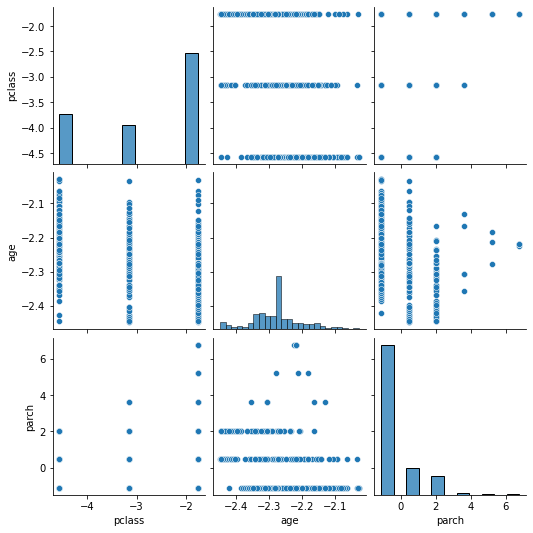

In [152]:
import seaborn as sns
sns.pairplot(X_train_sc)

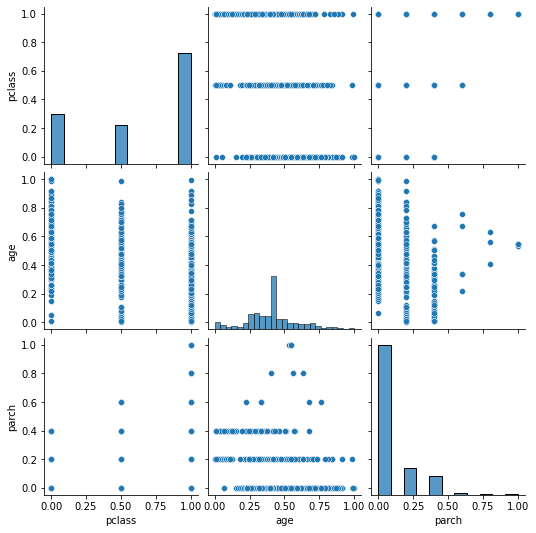

In [153]:
sns.pairplot(X_train_mmc)

In [ ]:
## 5.